In [45]:
import rlssm
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from scipy import stats

In [46]:
par_path = os.path.abspath(os.path.join(os.getcwd()))
data_path = os.path.join(par_path, 'data/data.csv')
data = pd.read_csv(data_path, index_col=0)

In [47]:
model = rlssm.RLDDModel(hierarchical_levels=2, separate_learning_rates=True, threshold_modulation=True, nonlinear_mapping=True)

Using cached StanModel


# Fit

In [48]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 1

# learning parameters
K = 4 # n options
initial_value_learning = 32.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
threshold_priors = None
ndt_priors = None
threshold_modulation_priors = {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
drift_asymptote_priors = {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}

In [49]:
# User-Supplied Initial Values:
n_participants = len(data.participant.unique())

def starting_values(chain_id, n_participants=n_participants):
    
    out = {
        'mu_alpha_pos': stats.norm.ppf(.1),
        'mu_alpha_neg': stats.norm.ppf(.1),
        #'mu_alpha': stats.norm.ppf(.1),
        'mu_drift_scaling': np.log(.5),
        #'mu_drift_asymptote': np.log(5),
        'mu_threshold': np.log(2),
        'mu_ndt': np.log(.1),
    
        'sd_alpha_pos':.1,
        'sd_alpha_neg':.1,
        #'sd_alpha':.1,
        'sd_drift_scaling':.1,
        #'sd_drift_asymptote':.1,
        'sd_threshold':.1,
        'sd_ndt':.1,
        
        'z_alpha_pos':list(np.random.normal(0, 1, n_participants)),
        'z_alpha_neg':list(np.random.normal(0, 1, n_participants)),
        #'z_alpha':list(np.random.normal(0, 1, n_participants)),
        'z_drift_scaling':list(np.random.normal(0, 1, n_participants)),
        #'z_drift_asymptote':list(np.random.normal(0, 1, n_participants)),
        'z_threshold':list(np.random.normal(0, 1, n_participants)),
        'z_ndt':list(np.random.normal(0, 1, n_participants))
    }
    
    return out

In [50]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    alpha_priors=alpha_priors,
    drift_scaling_priors=drift_scaling_priors,
    threshold_priors=threshold_priors,
    threshold_modulation_priors=threshold_modulation_priors,
    drift_asymptote_priors=drift_asymptote_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    init=starting_values,
    verbose = False)

Fitting the model using the priors:
alpha_pos_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
alpha_neg_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
drift_scaling_priors {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
drift_asymptote_priors {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
threshold_priors {'mu_mu': 1, 'sd_mu': 3, 'mu_sd': 0, 'sd_sd': 3}
threshold_modulation_priors {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 0, 'sd_sd': 5}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
Rejecting initial value:Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: wiener_lpdf: Boundary separation[91] is 0, but must be > 0!  (in 'unknown file name' at line 160)


  Error evaluating the log probability at the initial value.
Exception: wiener_lpdf: Boundary separation[1] is 0, but must be > 0!  (in 'unknown file name' at line 160)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Except

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: validate transformed params: threshold_sbj[i_0__] is -4.85725e+19, but must be greater than or equal to 0  (in 'unknown file name' at line 74)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: validate transformed params: threshold_sbj[i_0__] is -3.98526e+20, but must be greater than or equal to 0  (in 'unknown file name' at line 74)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or m

Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.
Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: wiener_lpdf: Boundary separation[376] is 0, but must be > 0!  (in 'unknown file name' at line 160)

Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.
Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: wiener_lpdf: Boundary separation[1] is 0, but must be > 0!  (in 'unknown file name' at line 160)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: wiener_lpdf: Boundary separation[1] is 0, but must be > 0!  (in 'unknown file name' at line 160)

Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initi

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: validate transformed params: threshold_sbj[i_0__] is -1.55833e+28, but must be greater than or equal to 0  (in 'unknown file name' at line 74)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: validate transformed params: threshold_sbj[i_0__] is -2.56809e+28, but must be greater than or equal to 0  (in 'unknown file name' at line 74)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or m

Iteration:  300 / 3000 [ 10%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.405122  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.340453  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Inform

Iteration:  300 / 3000 [ 10%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.406307  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.41433, but must be greater than nondecision time = 0.426212  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informa

Iteration:  600 / 3000 [ 20%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.332197  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.740769, but must be greater than nondecision time = 0.848747  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:  600 / 3000 [ 20%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.336858  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.406139  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Inform

Iteration:  900 / 3000 [ 30%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.406684  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.41146  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informa

Iteration:  900 / 3000 [ 30%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.406305  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.414187  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Inform

Iteration: 1200 / 3000 [ 40%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.406786  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.4108  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informat

Iteration: 1200 / 3000 [ 40%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.333353  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.406056, but must be greater than nondecision time = 0.411161  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration: 1500 / 3000 [ 50%]  (Warmup)
Iteration: 1501 / 3000 [ 50%]  (Sampling)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.623438, but must be greater than nondecision time = 0.675954  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.330658  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Inform

Iteration: 1500 / 3000 [ 50%]  (Warmup)
Iteration: 1501 / 3000 [ 50%]  (Sampling)
Iteration: 1800 / 3000 [ 60%]  (Sampling)
Iteration: 1800 / 3000 [ 60%]  (Sampling)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.331548  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.623438, but must be greater than nondecision time = 0.625945  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Inform

Iteration: 2100 / 3000 [ 70%]  (Sampling)
Iteration: 2100 / 3000 [ 70%]  (Sampling)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: wiener_lpdf: Random variable  = 0.330461, but must be greater than nondecision time = 0.331623  (in 'unknown file name' at line 160)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: validate transformed params: threshold_sbj[i_0__] is -0.00137019, but must be greater than or equal to 0  (in 'unknown file name' at line 74)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified

Iteration: 2400 / 3000 [ 80%]  (Sampling)
Iteration: 2400 / 3000 [ 80%]  (Sampling)
Iteration: 2700 / 3000 [ 90%]  (Sampling)
Iteration: 2700 / 3000 [ 90%]  (Sampling)
Iteration: 3000 / 3000 [100%]  (Sampling)

 Elapsed Time: 281.986 seconds (Warm-up)
               228.89 seconds (Sampling)
               510.876 seconds (Total)

Iteration: 3000 / 3000 [100%]  (Sampling)

 Elapsed Time: 247.923 seconds (Warm-up)
               303.398 seconds (Sampling)
               551.321 seconds (Total)



To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
26.0 of 3000 iterations ended with a divergence (0.8666666666666667%)
  Try running with larger adapt_delta to remove the divergences
0 of 3000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [51]:
model_fit.rhat

,rhat,variable
0,0.999647,mu_alpha_pos
1,0.999554,mu_alpha_neg
2,1.001316,mu_drift_scaling
3,1.000457,mu_drift_asymptote
4,1.000285,mu_threshold
5,0.999628,mu_threshold_modulation
6,1.000314,mu_ndt
7,0.999914,sd_alpha_pos
8,0.999466,sd_alpha_neg
9,0.999784,sd_drift_scaling


In [52]:
model_fit.waic

{'lppd': -462.70891949529414,
 'p_waic': 16.483667910929423,
 'waic': 958.3851748124471,
 'waic_se': 48.42079882384683}

In [53]:
model_fit.samples

,chain,draw,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_drift_scaling,transf_mu_drift_asymptote,transf_mu_threshold,transf_mu_threshold_modulation,transf_mu_ndt,alpha_pos_sbj[1],...,threshold_modulation_sbj[1],threshold_modulation_sbj[2],threshold_modulation_sbj[3],threshold_modulation_sbj[4],threshold_modulation_sbj[5],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4],ndt_sbj[5]
0,0,1461,0.040580,0.212192,0.026153,15.251134,4.876327,-0.061015,0.390794,0.042047,...,-0.081272,-0.043050,-0.099015,-0.052711,-0.072277,0.290677,0.296462,0.374727,0.424524,0.495234
1,0,884,0.034719,0.171086,0.579231,11.280228,7.590010,-0.107392,0.384398,0.030236,...,-0.102073,-0.087066,-0.111997,-0.105232,-0.105324,0.265712,0.294524,0.363519,0.483701,0.572015
2,0,438,0.020064,0.032845,0.078340,10.368701,5.983284,-0.107400,0.502910,0.019072,...,-0.147569,-0.103302,-0.112963,-0.088999,-0.112166,0.267295,0.252613,0.387400,0.462032,0.504452
3,0,674,0.033143,0.015125,0.047572,10.221385,5.824582,-0.094285,0.628345,0.037714,...,-0.107625,-0.075322,-0.115199,-0.090020,-0.087720,0.281691,0.304304,0.364246,0.526694,0.534638
4,0,1344,0.028386,0.081005,0.104486,7.529956,5.556817,-0.099455,0.510582,0.029418,...,-0.103986,-0.098140,-0.108550,-0.093081,-0.085893,0.287767,0.204997,0.373395,0.493317,0.565024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,697,0.039683,0.218042,0.064651,6.183251,5.726359,-0.102995,0.472644,0.028613,...,-0.112203,-0.076261,-0.112174,-0.095730,-0.099828,0.272302,0.349263,0.357677,0.498723,0.529529
2996,1,722,0.045778,0.010328,0.051127,6.235696,5.382035,-0.094914,0.381902,0.039645,...,-0.094930,-0.094942,-0.095075,-0.095184,-0.095130,0.278307,0.361133,0.376250,0.522914,0.516649
2997,1,818,0.031263,0.004323,0.149405,5.615022,5.933898,-0.101392,0.367433,0.031121,...,-0.110757,-0.079279,-0.120473,-0.102363,-0.097950,0.271096,0.272781,0.375612,0.509895,0.544610
2998,1,1045,0.028392,0.025841,0.136336,10.625906,6.401731,-0.116269,0.412528,0.014468,...,-0.128390,-0.105991,-0.139419,-0.109567,-0.113727,0.276335,0.296813,0.365018,0.460369,0.506148


In [54]:
model_fit.samples.describe()

,chain,draw,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_drift_scaling,transf_mu_drift_asymptote,transf_mu_threshold,transf_mu_threshold_modulation,transf_mu_ndt,alpha_pos_sbj[1],...,threshold_modulation_sbj[1],threshold_modulation_sbj[2],threshold_modulation_sbj[3],threshold_modulation_sbj[4],threshold_modulation_sbj[5],ndt_sbj[1],ndt_sbj[2],ndt_sbj[3],ndt_sbj[4],ndt_sbj[5]
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.500000,749.500000,0.031300,0.127608,0.094006,9.102233,5.983252,-0.106384,0.412997,0.030202,...,-0.114836,-0.090700,-0.126178,-0.100544,-0.099047,0.279313,0.304896,0.373833,0.475700,0.526458
std,0.500083,433.084792,0.010086,0.085413,0.072032,3.035716,0.829663,0.029005,0.086648,0.010964,...,0.026394,0.028167,0.026934,0.027837,0.027227,0.017758,0.037055,0.012123,0.035676,0.028447
min,0.000000,0.000000,0.006852,0.000328,0.005459,0.007374,3.433109,-0.274208,0.193971,0.004581,...,-0.274575,-0.284243,-0.276782,-0.261574,-0.258599,0.192610,0.120935,0.311782,0.296438,0.386091
25%,0.000000,374.750000,0.024332,0.062319,0.054798,7.098983,5.443918,-0.120064,0.362092,0.022469,...,-0.126849,-0.104007,-0.139137,-0.113168,-0.112380,0.269195,0.282089,0.366654,0.455411,0.508945
50%,0.500000,749.500000,0.031105,0.111783,0.077499,8.850685,5.894530,-0.102998,0.399789,0.029667,...,-0.110943,-0.086503,-0.122180,-0.096802,-0.095472,0.281724,0.308695,0.375796,0.479247,0.529852
75%,1.000000,1124.250000,0.037614,0.174581,0.110015,10.876657,6.385249,-0.088400,0.445773,0.036844,...,-0.097369,-0.072257,-0.108179,-0.082392,-0.081310,0.292605,0.331427,0.382575,0.500806,0.546918
max,1.000000,1499.000000,0.103632,0.615913,1.117725,21.368489,10.544414,0.001050,1.084727,0.089163,...,-0.049765,-0.004002,-0.062487,-0.030621,-0.021691,0.315332,0.394429,0.400389,0.563986,0.594319


In [55]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

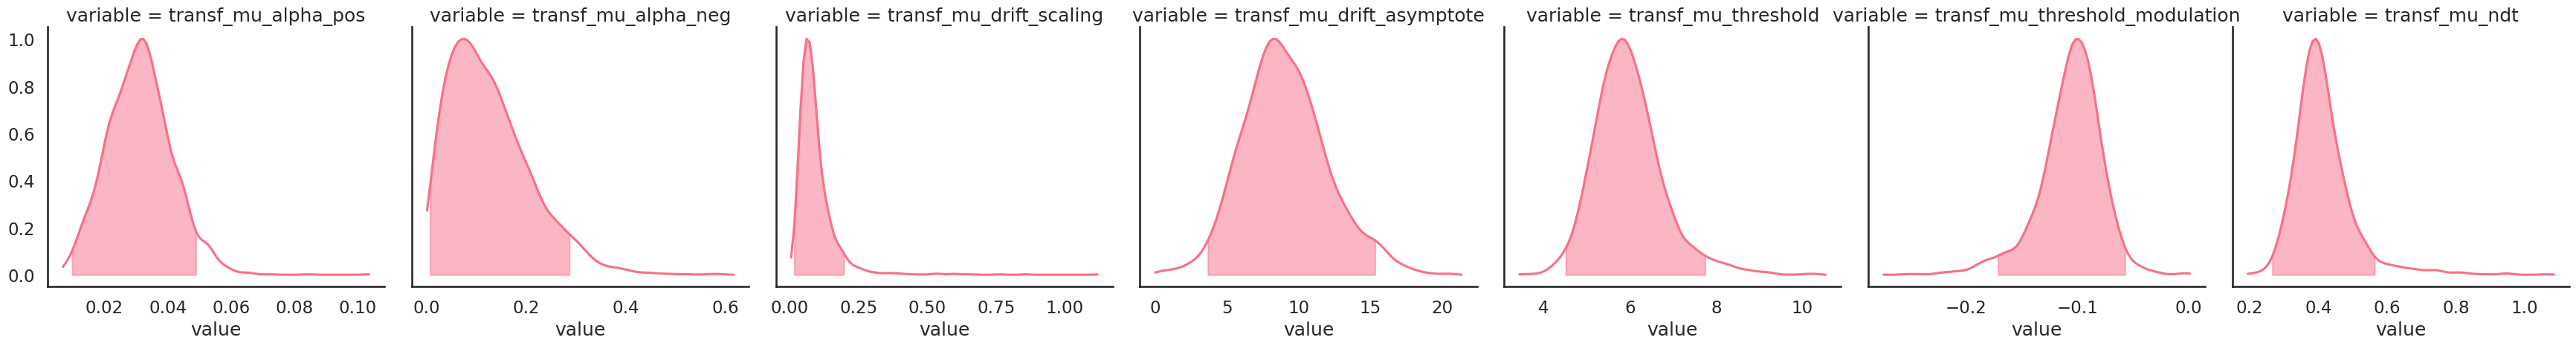

In [56]:
model_fit.plot_posteriors(height=5, show_intervals='HDI')

In [57]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'
data.loc[(data.cor_option == 4) & (data.inc_option == 1), 'choice_pair'] = 'AD'
data.loc[(data.cor_option == 3) & (data.inc_option == 2), 'choice_pair'] = 'BC'

data['block_bins'] = pd.cut(data.trial_block, 6, labels=np.arange(1, 7))

In [58]:
# grouped_df = data.groupby(['block_bins', 'choice_pair']).agg({'accuracy': 'mean', 'rt':'mean'}).reset_index()


# plt.figure(figsize=(10, 6))
# sns.lineplot(data=grouped_df, x='block_bins', y='accuracy', hue='choice_pair' ,linestyle='--')

# # 设置图形标题和标签
# plt.title('Accuracy by Trials and Choice Pair')
# plt.xlabel('Trials')
# plt.ylabel('Accuracy')

# # 显示图形
# plt.tight_layout()
# plt.show()



# plt.figure(figsize=(10, 6))
# sns.lineplot(data=grouped_df, x='block_bins', y='rt', hue='choice_pair', linestyle='--')

# # 设置图形标题和标签
# plt.title('RT by Trials and Choice Pair')
# plt.xlabel('Trials')
# plt.ylabel('RT')

# # 显示图形
# plt.tight_layout()
# plt.show()

In [60]:
pp_grouped = model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['choice_pair', 'block_bins'], 
                                                                 n_posterior_predictives=100)

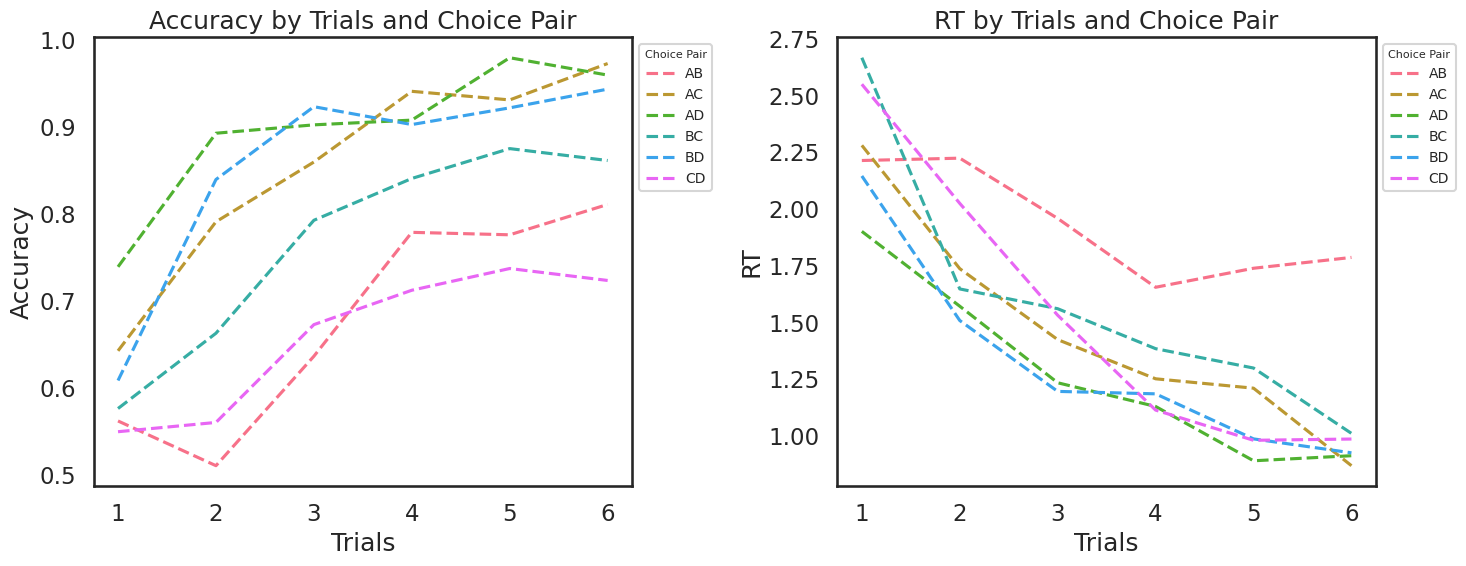

In [ ]:
group_mean = pp_grouped.groupby(['block_bins', 'choice_pair']).agg({'mean_accuracy': 'mean', 'mean_rt':'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=group_mean, x='block_bins', y='mean_accuracy', hue='choice_pair' ,linestyle='--')

# 设置图形标题和标签
plt.title('Accuracy by Trials and Choice Pair')
plt.xlabel('Trials')
plt.ylabel('Accuracy')
plt.legend(title='Choice Pair', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, title_fontsize="8")
# 显示图形
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=group_mean, x='block_bins', y='mean_rt', hue='choice_pair' ,linestyle='--')

# 设置图形标题和标签
plt.title('Accuracy by Trials and Choice Pair')
plt.xlabel('Trials')
plt.ylabel('RT')
plt.legend(title='Choice Pair', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, title_fontsize="8")
# 显示图形
plt.tight_layout()
plt.show()

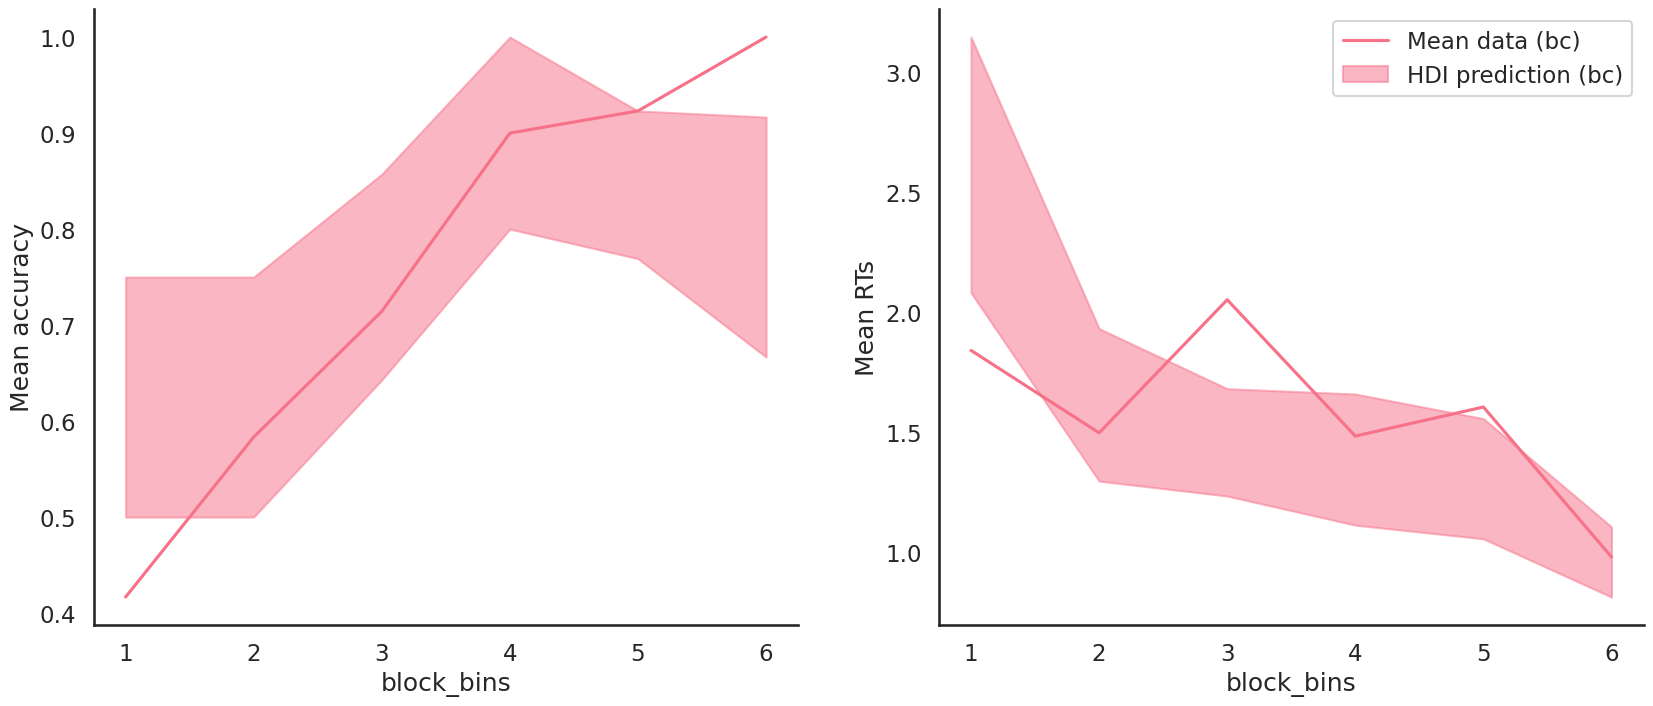

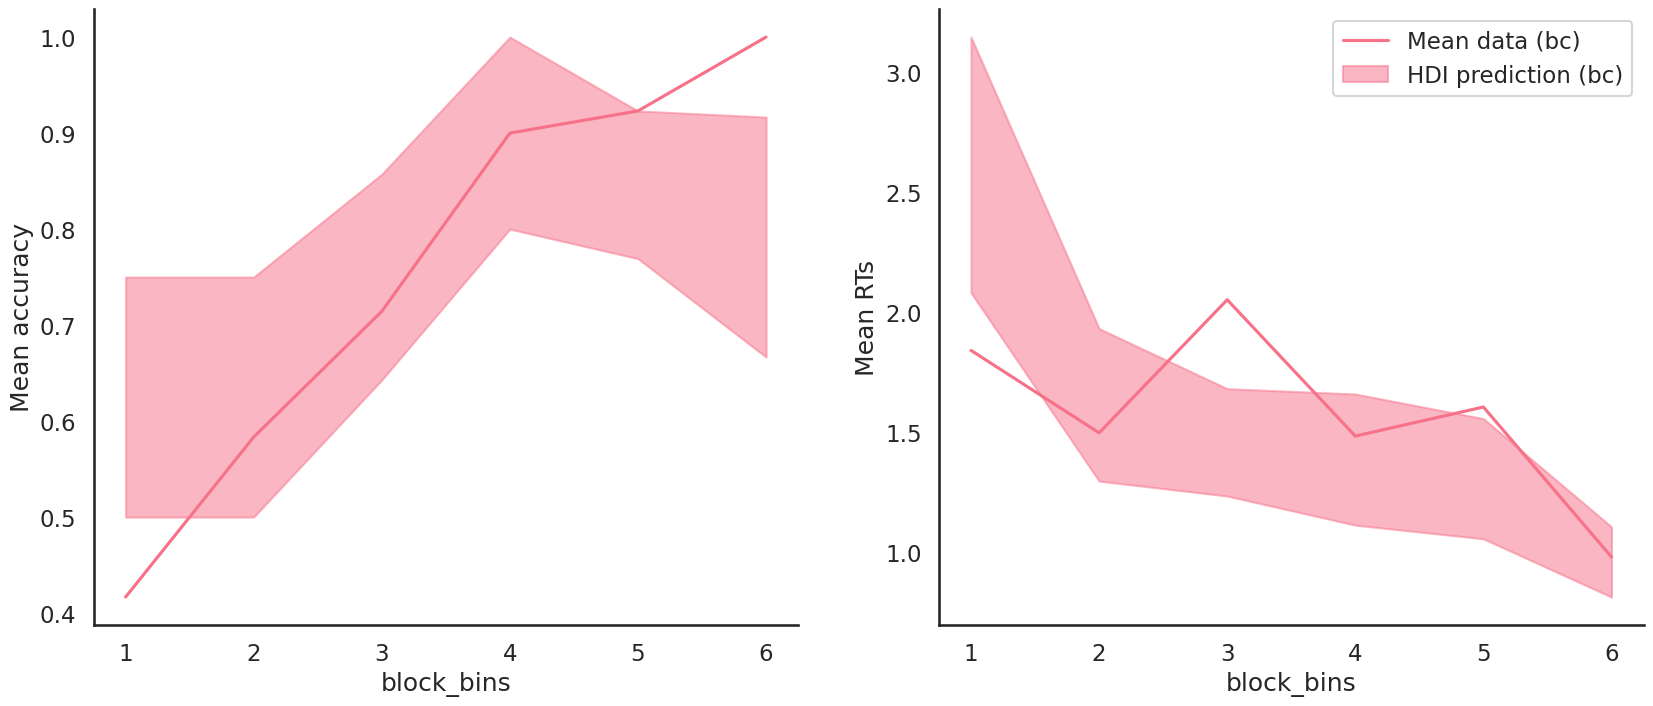

In [63]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins', 'choice_pair'],
    n_posterior_predictives=100,
    figsize=(20,8),
    hue_labels=['bc'],
    hue_order=['BC'],
    palette= sns.color_palette('husl'),
    show_intervals='HDI',
    alpha_intervals = .25)

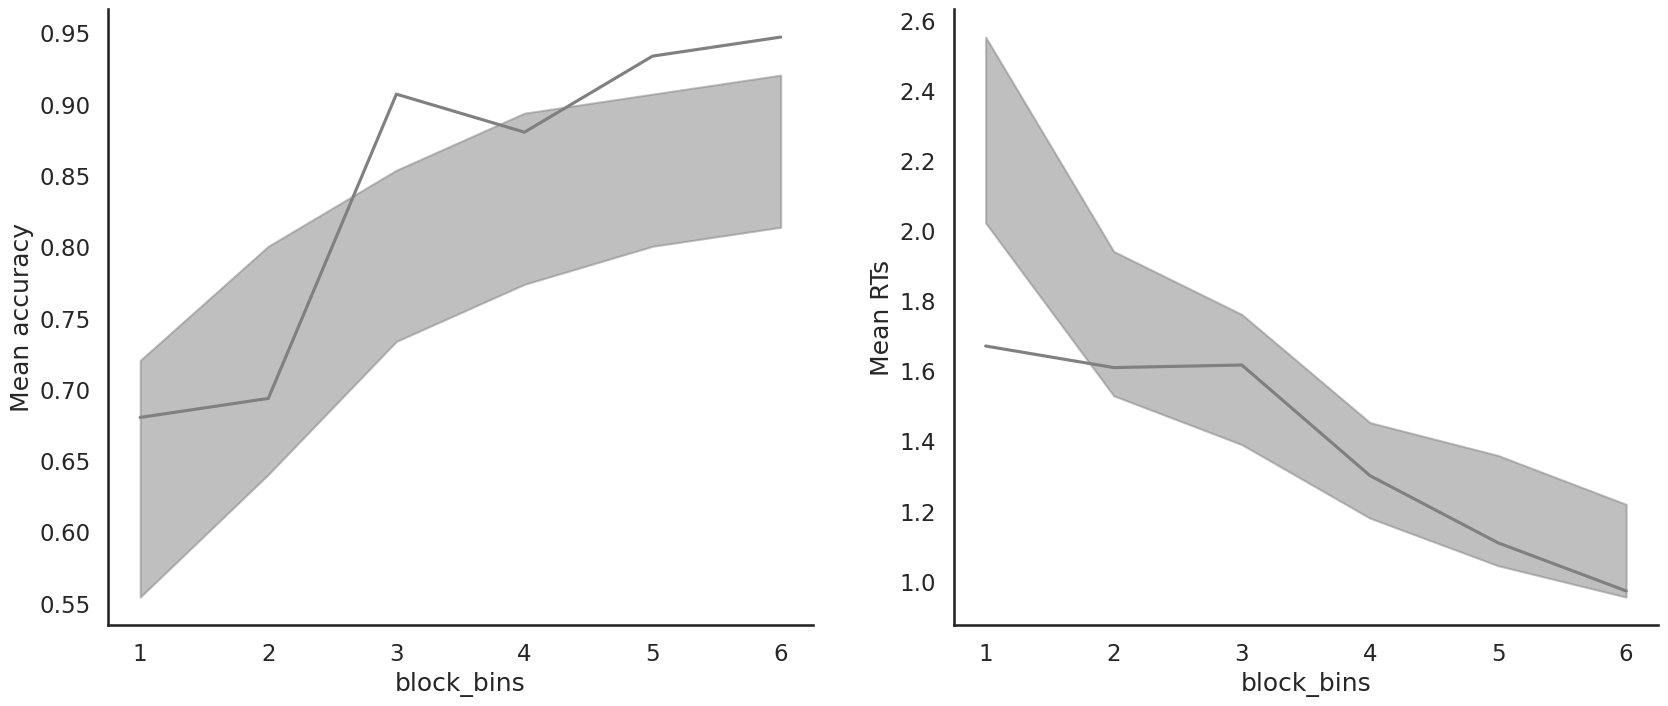

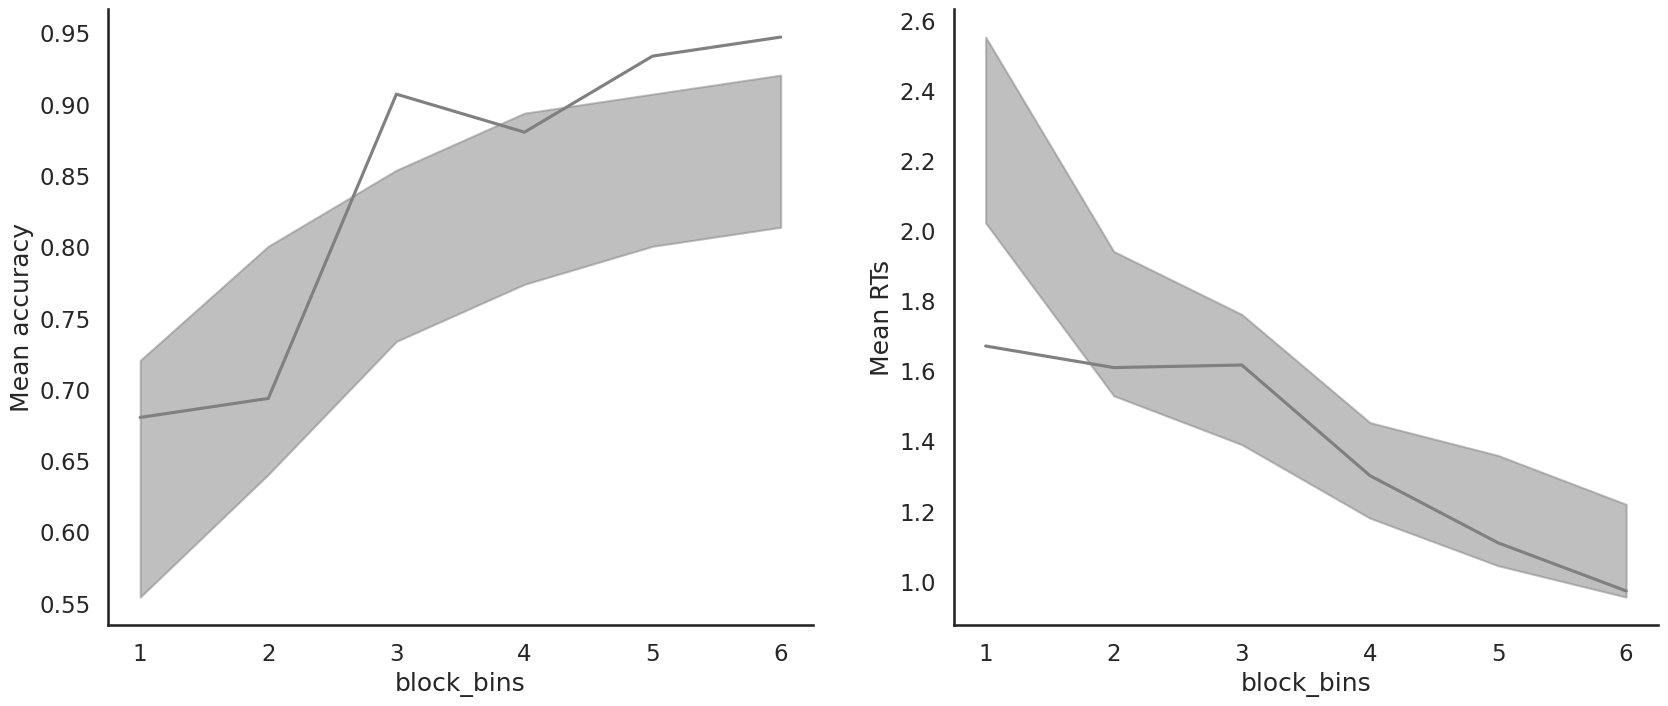

In [64]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8),
    alpha_intervals=0.1)